### Importing libraries

In [1]:
# dealing with dataframes and arrays
import pandas as pd
import numpy as np
# for date time operations
from datetime import date
import datetime
# visualisations libraries
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.express as px
import missingno as mn
from yellowbrick.cluster import KElbowVisualizer
# for preprocessing and machine learning tasks
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import warnings 
warnings.filterwarnings('ignore')

### Data set reading and data description

In [2]:
df = pd.read_csv("E:\marketing_campaign.csv",sep='\t')

In [3]:
df.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,...,20,1,0,0,0,0,0,3,11,0


In [4]:
df.shape

(2240, 29)

#### Data descriptions

In [5]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

#### Missing Values

In [7]:
print(f"{df.isnull().mean().sort_values(ascending=False) * 100}")

Income                 1.071429
Response               0.000000
MntSweetProducts       0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntGoldProds           0.000000
Z_Revenue              0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Z_CostContact          0.000000
ID                     0.000000
dtype: float64


So we only have to deal with missing values in the income feature of the dataset

In [8]:
color = ['#EAEAEA','#FF2E63','#252A34','#08D9D6','black']

<AxesSubplot:>

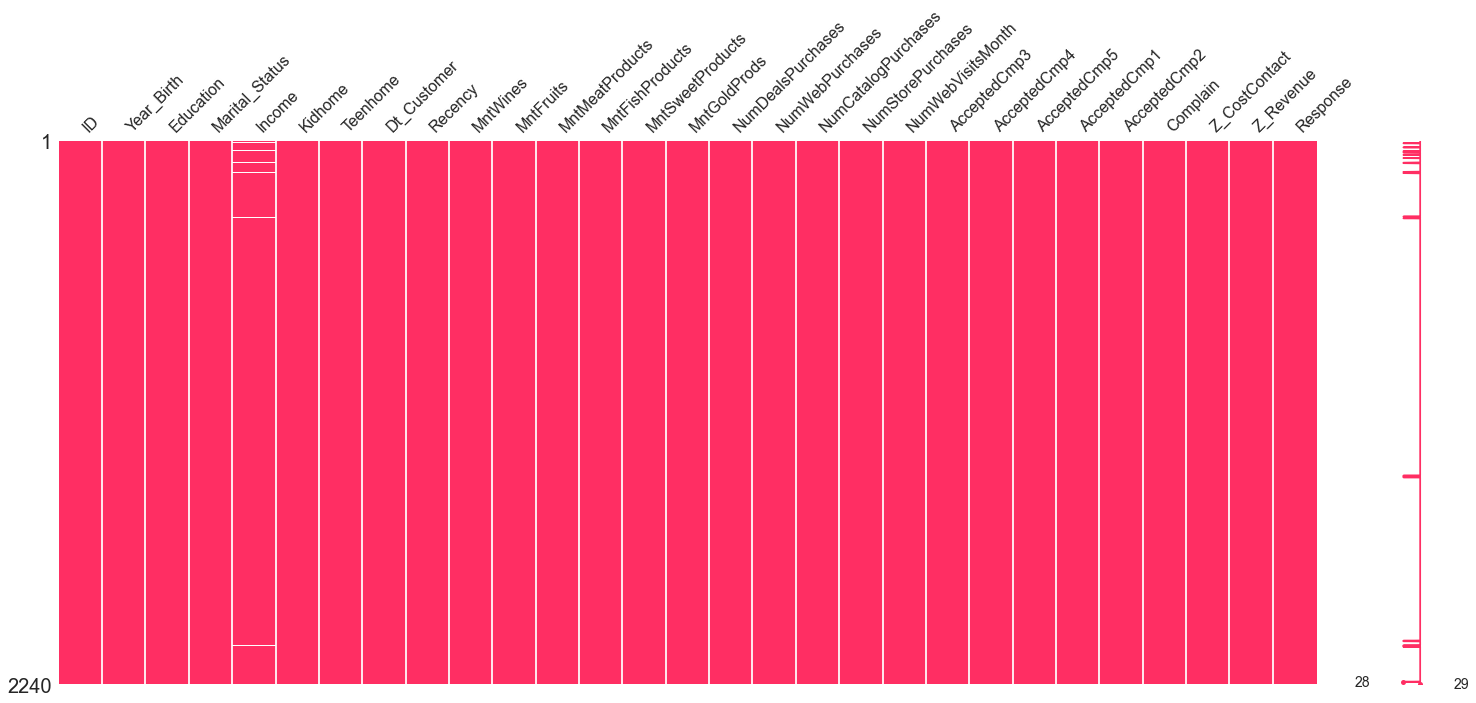

In [9]:
mn.matrix(df,color=(matplotlib.colors.to_rgb(color[1])))

In [10]:
df['Income'] = df.Income.fillna(df.Income.median())

We use median for imputation because it is insensitive to the outliers

#### Feautre Engineering

In [11]:
# first of all lets remove the response so as to not make it confusing for latter on as we are 
# adding multiple new features
response = df.Response
df.drop("Response",axis=1,inplace=True)

In [12]:
df.Education.unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [13]:
# Since 2n cycle is pretty much similar to the masters we will replace it with masters
df.Education = df.Education.str.replace("2n Cycle","Master")

In [14]:
df.Education.value_counts()

Graduation    1127
Master         573
PhD            486
Basic           54
Name: Education, dtype: int64

In [15]:
df.Marital_Status.unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

Making our life easier by making this feature binomial in nature would also help the algorithm to learn better.

In [16]:
# Renaming categories
df['Marital_Status'] = df['Marital_Status'].str.replace('Married', 'Not Single')
df['Marital_Status'] = df['Marital_Status'].str.replace('Together', 'Not Single')
df['Marital_Status'] = df['Marital_Status'].str.replace('Divorced', 'Single')
df['Marital_Status'] = df['Marital_Status'].str.replace('Widow', 'Single')
df['Marital_Status'] = df['Marital_Status'].str.replace('Absurd', 'Single')
df['Marital_Status'] = df['Marital_Status'].str.replace('Alone', 'Single')
df['Marital_Status'] = df['Marital_Status'].str.replace('YOLO', 'Single')

In [17]:
df.Marital_Status.value_counts()

Not Single    1444
Single         796
Name: Marital_Status, dtype: int64

In [18]:
df['Children'] = df.Kidhome + df.Teenhome

In [19]:
df['Expenses'] = df.MntFruits + df.MntFishProducts + df.MntMeatProducts + \
df.MntGoldProds + df.MntSweetProducts + df.MntWines 

In [20]:
date_enrolled = pd.to_datetime(df.Dt_Customer)
todays_date = pd.to_datetime(date.today())
number_of_days_with_company = todays_date - date_enrolled
df['Days_enrolled'] = number_of_days_with_company

In [21]:
df["Age"] = todays_date.year - df.Year_Birth

In [22]:
df['Response'] = response

In [23]:
df.Z_CostContact.unique()

array([3], dtype=int64)

In [24]:
df.Z_Revenue.unique()

array([11], dtype=int64)

In [25]:
df.drop('Z_CostContact',axis=1,inplace=True)
df.drop("Z_Revenue",axis=1,inplace=True)
# dropping because no value is added by this feature

In [26]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Children,Expenses,Days_enrolled,Age,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,0,1617,3495 days,64,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,2,27,2649 days,67,0
2,4141,1965,Graduation,Not Single,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,0,776,2996 days,56,0
3,6182,1984,Graduation,Not Single,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,1,53,2589 days,37,0
4,5324,1981,PhD,Not Single,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,1,422,2845 days,40,0


### Data Visualisations

In [27]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Children', 'Expenses', 'Days_enrolled',
       'Age', 'Response'],
      dtype='object')

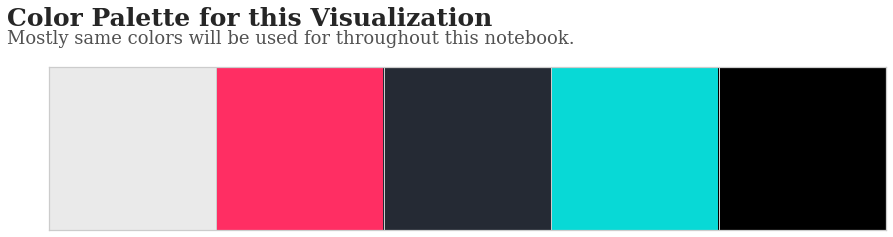

In [28]:
# color palette for visualizations
palette = sns.color_palette( palette = color)

sns.palplot(palette,size=3)
plt.text(-0.75,-0.75,'Color Palette for this Visualization', {'fontname':'serif', 'size':25, 'weight':'bold'})
plt.text(-0.75,-0.64,'Mostly same colors will be used for throughout this notebook.', {'fontname':'serif', 'size':18, 'weight':'normal'}, alpha = 0.8)
plt.show()

#### Continous Variables

In [29]:
df.Days_enrolled = list(map(lambda x:int(str(x).split()[0]),df.Days_enrolled))

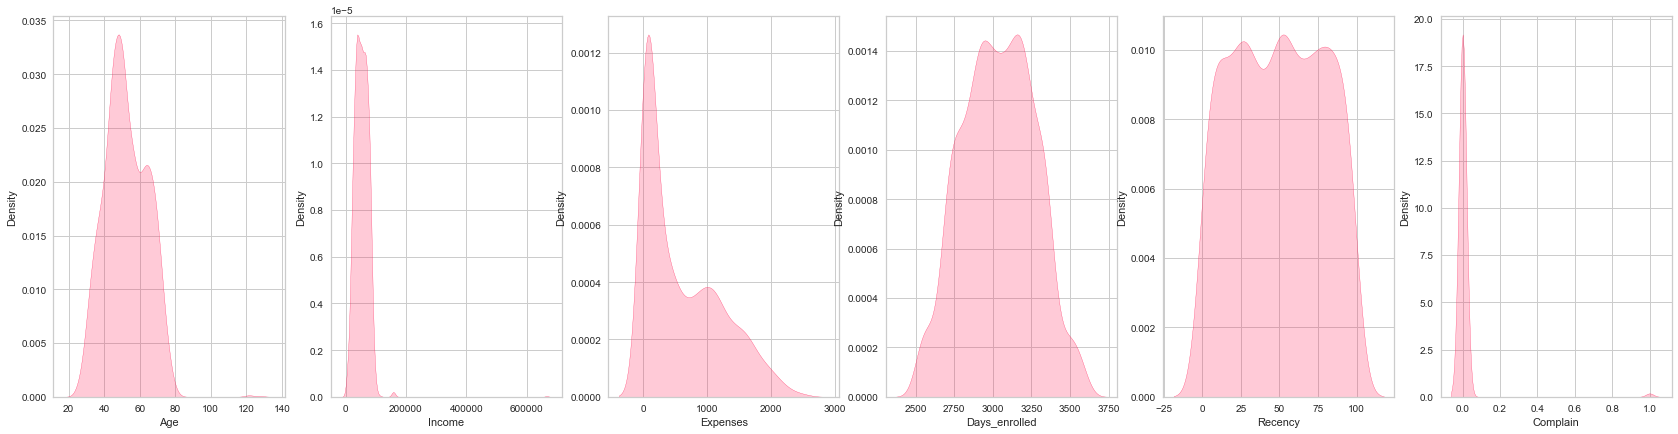

In [30]:
col = ['Age','Income','Expenses','Days_enrolled','Recency','Complain']
fig,axes = plt.subplots(1,6,figsize=(29,7))
for i in range(6):
    sns.kdeplot(df[col[i]] ,ax=axes[i],color=color[1],fill=True)

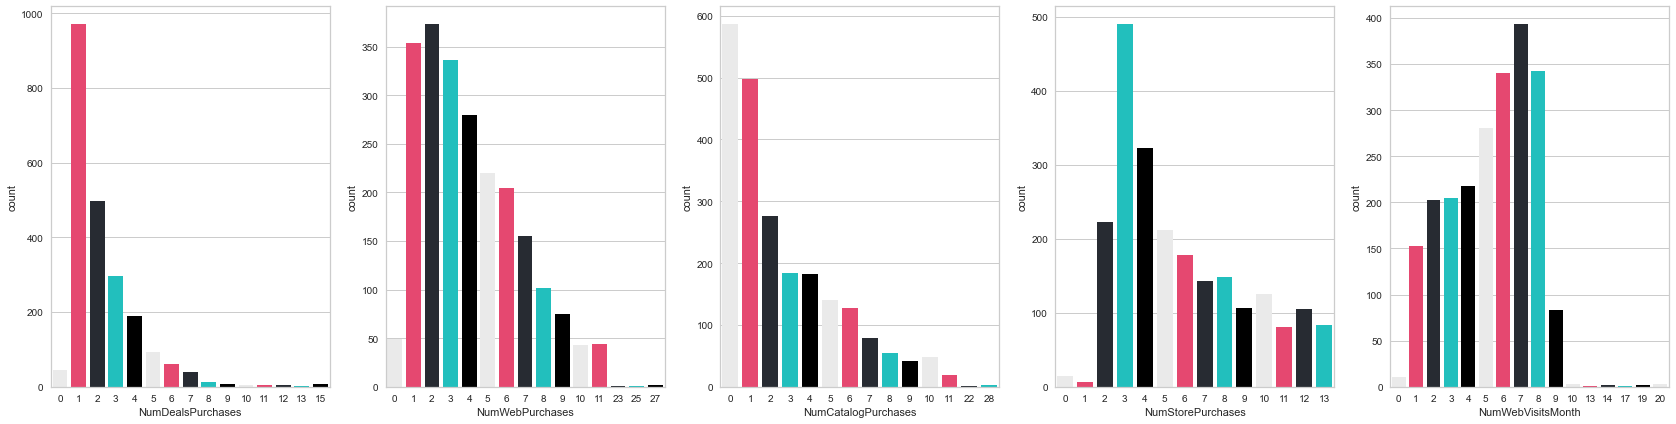

In [31]:
c = ['NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
fig,axes = plt.subplots(1,5,figsize=(29,7))
for i in range(5):
    sns.countplot(df[c[i]] ,ax=axes[i],palette=palette)

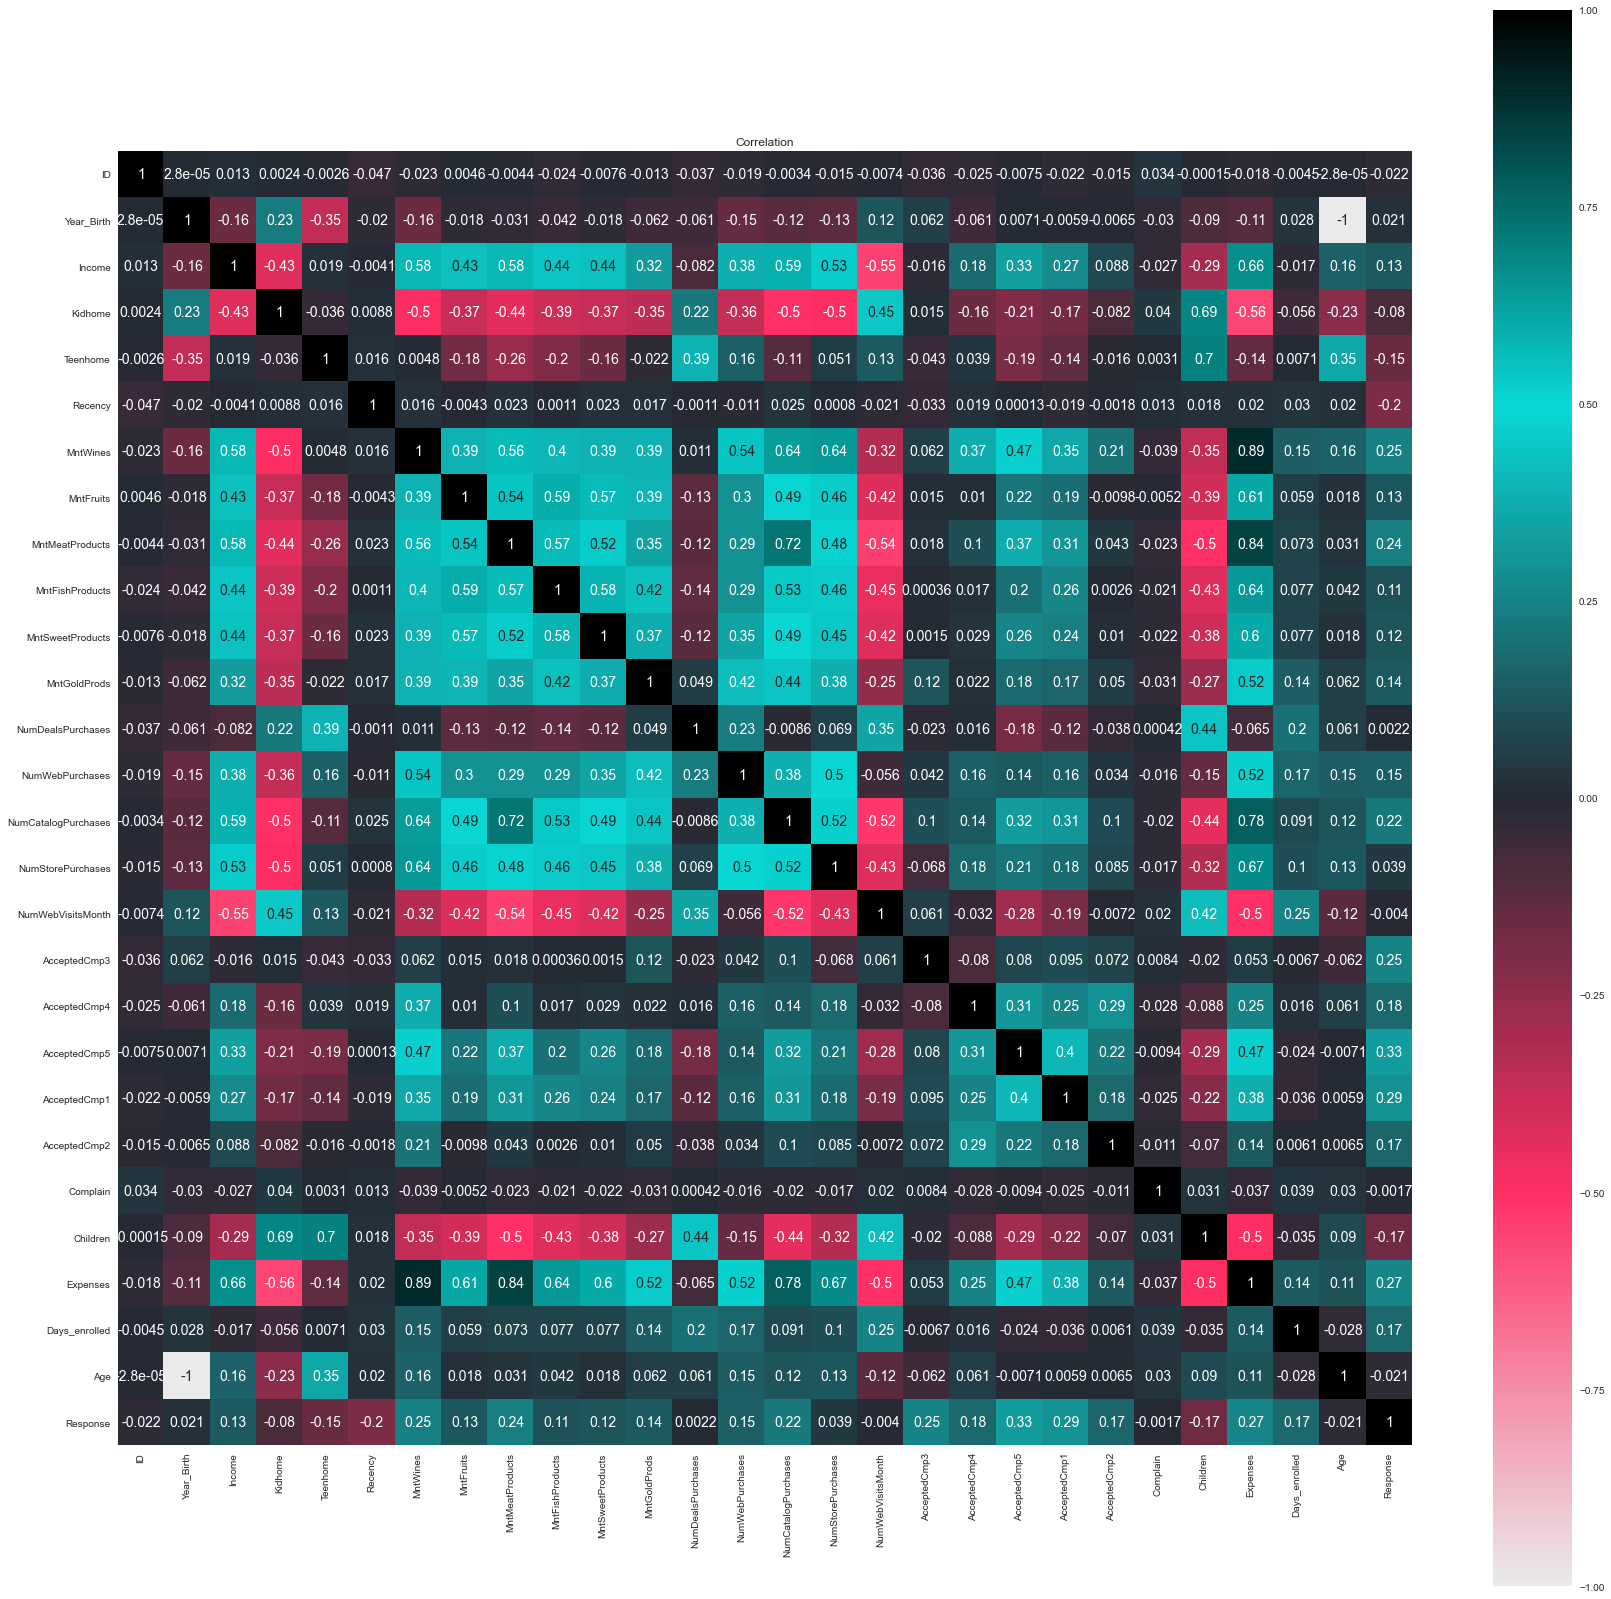

In [32]:
corr = df.corr()
plt.figure(figsize=(29,29))
sns.heatmap(corr, annot=True,square=True,cmap = matplotlib.colors.LinearSegmentedColormap.from_list("",color) , annot_kws={'size': 14})
plt.title("Correlation")
plt.show()

No highly correlated features which coulbe be dropped

In [33]:
categorical_columns = ['Education', 'Marital_Status','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2','Response']

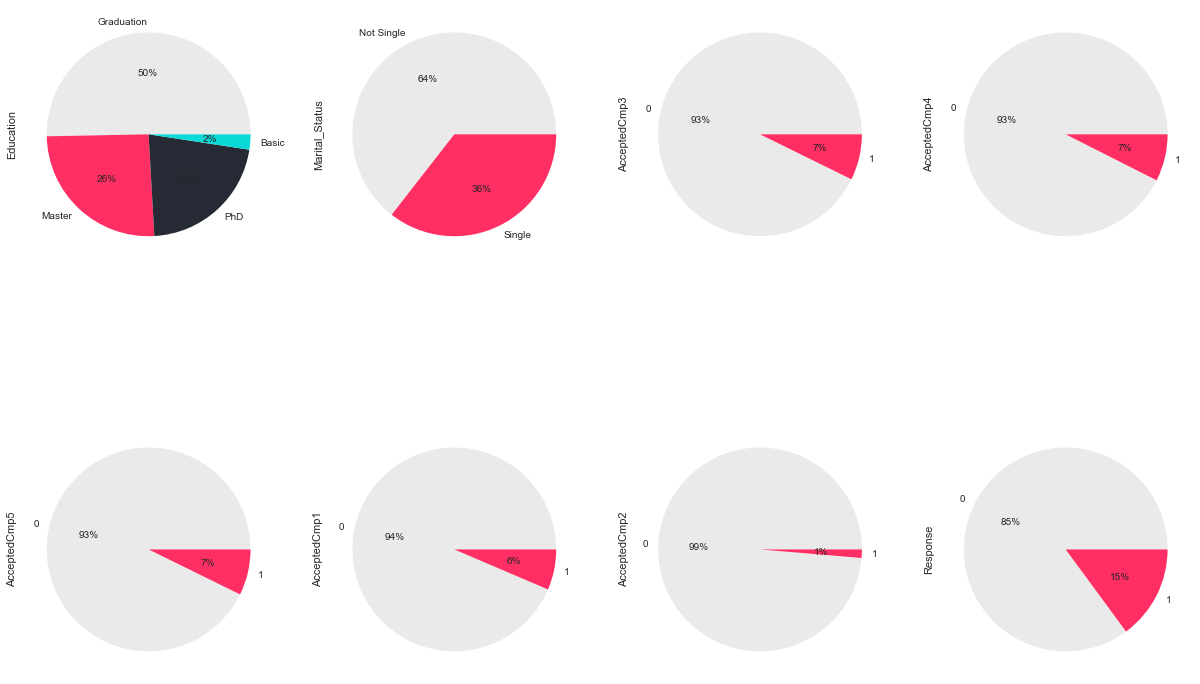

In [34]:
fig,axes = plt.subplots(2,4,figsize=(21,14))
f =0 
for i in range(2):
    for j in range(4):

        df[categorical_columns[f]].value_counts().plot(kind='pie',ax=axes[i][j], colors = color ,fontsize=10, autopct='%1.0f%%')
        f+=1
fig.show()


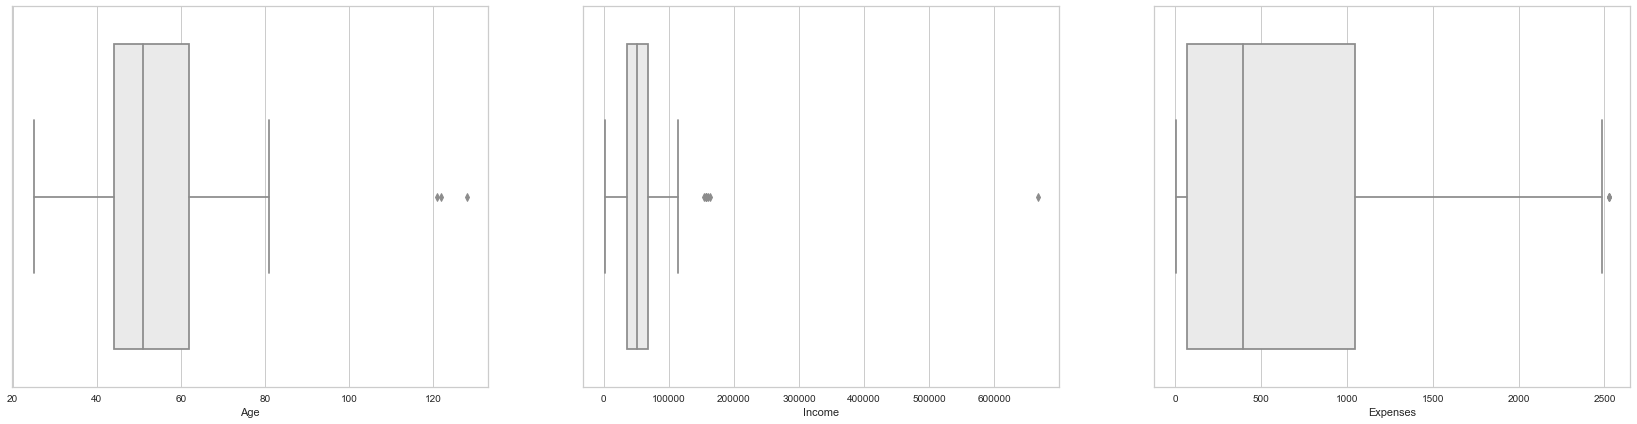

In [35]:
col = ['Age','Income','Expenses']
fig,axes = plt.subplots(1,3,figsize=(29,7))
for i in range(3):
    sns.boxplot(df[col[i]] ,ax=axes[i],palette=palette)

We can see some **outliers** in the Age and Income features

#### Dealing with outliers

In [36]:
from scipy import stats

In [37]:
df = df[np.abs(stats.zscore(df['Income'])) < 3]

In [38]:
df = df[np.abs(stats.zscore(df['Age'])) < 3]

In [39]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Children,Expenses,Days_enrolled,Age,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,0,1617,3495,64,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,2,27,2649,67,0
2,4141,1965,Graduation,Not Single,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,0,776,2996,56,0
3,6182,1984,Graduation,Not Single,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,1,53,2589,37,0
4,5324,1981,PhD,Not Single,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,1,422,2845,40,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Not Single,61223.0,0,1,13-06-2013,46,709,...,0,0,0,0,0,1,1341,3065,54,0
2236,4001,1946,PhD,Not Single,64014.0,2,1,10-06-2014,56,406,...,0,0,1,0,0,3,444,2585,75,0
2237,7270,1981,Graduation,Single,56981.0,0,0,25-01-2014,91,908,...,1,0,0,0,0,0,1241,2839,40,0
2238,8235,1956,Master,Not Single,69245.0,0,1,24-01-2014,8,428,...,0,0,0,0,0,1,843,2840,65,0


In [40]:
# creating copy of dataset for classification 
df_classification = df.copy()
# creating a subset of dataframe by dropping the features on deals accepted and promotions
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response','Dt_Customer']
df.drop(cols_del, axis=1,inplace=True)

#### Standardization
- By standarizing the continous variables we make them all equally important to the analysis. This is credical because if there are large differences between the range of the numerical variables, those variable with higher range of values will dominate over those with smaller ranges.

- Standardization rescales data to have a mean (𝜇) of 0 and standard deviation (𝜎) of 1 (unit variance).
$$Z = \frac{X - \mu}{\sigma}$$

In [41]:
#Scaling
scaler = StandardScaler()
scaled_df = df.copy()
for i in df.select_dtypes(exclude='object').columns:
    scaled_df.loc[:, i] = StandardScaler().fit_transform(np.array(df[[i]]))
print("All features are now scaled")

All features are now scaled


In [42]:
feature_to_encode = ['Marital_Status','Education']
le = LabelEncoder()
for i in feature_to_encode:
    scaled_df[i]=scaled_df[[i]].apply(le.fit_transform)

print("All features are now numerical")

All features are now numerical


In [43]:
scaled_df.drop('ID',axis=1,inplace=True)

In [44]:
scaled_df.drop('Year_Birth',axis=1,inplace=True)

In [45]:
scaled_df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Children,Expenses,Days_enrolled,Age
0,1,1,0.316484,-0.825592,-0.931676,0.307314,0.980166,1.550778,1.736151,2.456789,...,0.842690,0.358938,1.405471,2.633984,-0.559160,0.689920,-1.266277,1.683247,1.976013,1.015715
1,1,1,-0.256135,1.031365,0.904492,-0.383771,-0.873191,-0.637618,-0.726371,-0.651738,...,-0.731824,-0.168815,-1.117198,-0.585437,-1.176175,-0.138430,1.393978,-0.962795,-1.666837,1.272020
2,1,0,0.970719,-0.825592,-0.931676,-0.798422,0.359410,0.569773,-0.174584,1.341376,...,-0.040574,-0.696567,1.405471,-0.227723,1.291882,-0.552605,-1.266277,0.283674,-0.172666,0.332234
3,1,0,-1.212506,1.031365,-0.931676,-0.798422,-0.873191,-0.562156,-0.662528,-0.505455,...,-0.751025,-0.168815,-0.756817,-0.943150,-0.559160,0.275745,0.063851,-0.919526,-1.925195,-1.291031
4,3,0,0.324010,1.031365,-0.931676,1.551268,-0.392031,0.418849,-0.215626,0.152822,...,-0.559011,1.414444,0.324327,0.129990,0.057854,-0.138430,0.063851,-0.305445,-0.822867,-1.034726


### Dimensionality Reduction

In [46]:
#Initiating PCA to reduce dimentions aka features to 3
pca = PCA(n_components=7,random_state=42)
pca.fit(scaled_df)
PCA_ds = pd.DataFrame(pca.transform(scaled_df))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
0,2229.0,3.785417e-18,2.761157,-5.639459,-2.512563,-0.724000,2.428561,7.431120
1,2229.0,1.474320e-17,1.533514,-3.265457,-1.284487,-0.186740,1.084108,5.777205
2,2229.0,-7.371602e-18,1.216654,-3.298484,-0.848733,0.030185,0.805995,5.720759
3,2229.0,4.542501e-17,1.039860,-3.673788,-0.713018,-0.017888,0.674486,3.695956
4,2229.0,-1.249094e-17,1.004184,-2.270695,-0.823323,-0.004933,0.836590,2.365288
5,2229.0,-2.514999e-17,0.953286,-3.609578,-0.648242,0.046157,0.621592,3.809645
6,2229.0,-4.383115e-17,0.870554,-2.621013,-0.555434,-0.035226,0.526348,5.341001


In [47]:
PCA_ds

,0,1,2,3,4,5,6
0,4.452164,0.201982,2.436039,-0.173881,0.655048,-1.200854,-1.555176
1,-2.804200,0.192493,-2.137657,1.210052,-0.487609,-0.489350,-0.212744
2,2.171439,-0.691698,-0.079736,-0.764106,-0.805946,-0.697759,0.616782
3,-2.699830,-1.869481,-0.140294,0.653565,-1.208145,0.672327,1.135331
4,-0.356525,-0.100404,0.401792,1.104456,0.866414,1.989845,0.519163
...,...,...,...,...,...,...,...
2224,2.817934,1.476661,1.041420,0.636350,-0.222198,-1.836099,1.970637
2225,-2.174861,3.821062,-1.476304,1.646634,-0.524350,2.141600,0.017551
2226,1.895518,-1.240223,0.062433,-0.617012,1.327579,1.347585,1.067719
2227,2.005453,1.019756,-1.726068,-0.205151,-1.429941,-0.465339,0.159297


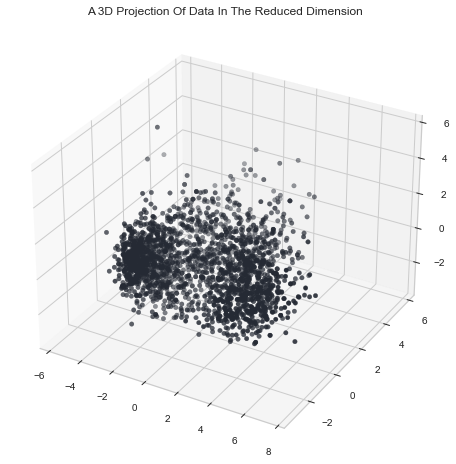

In [48]:
#A 3D Projection Of Data In The Reduced Dimension
x =PCA_ds[0]
y =PCA_ds[1]
z =PCA_ds[2]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c=color[2], marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

Elbow Method to determine the number of clusters to be formed:


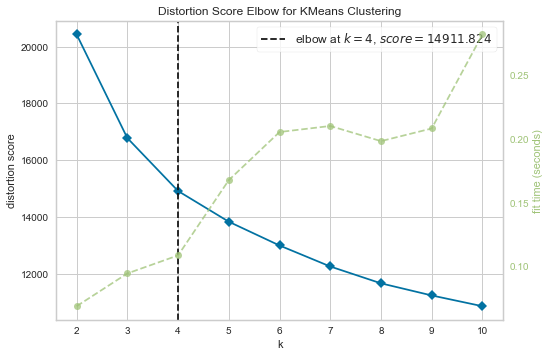

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [49]:
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(random_state=42), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

This plot dictates that the **optimal** number of **clusters** is **4**

In [50]:
km = KMeans(4,max_iter=500,random_state=42)
km.fit(PCA_ds)

KMeans(max_iter=500, n_clusters=4, random_state=42)

In [51]:
clusters = km.fit_predict(PCA_ds)

In [52]:
clusters

array([3, 2, 3, ..., 3, 1, 2])

In [53]:
PCA_ds['Clusters'] = clusters

In [54]:
df['Clusters'] = clusters

#### Cluster Interpretation

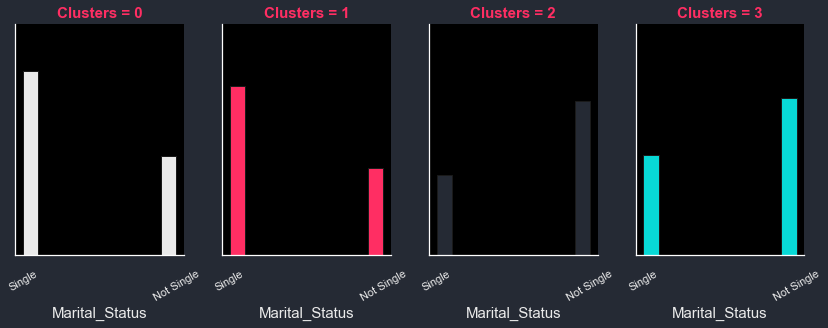

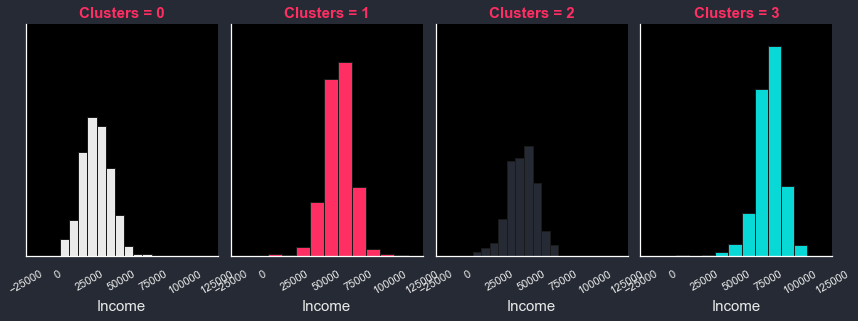

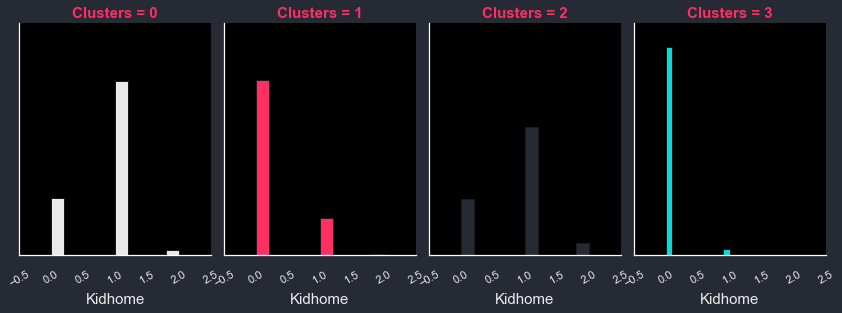

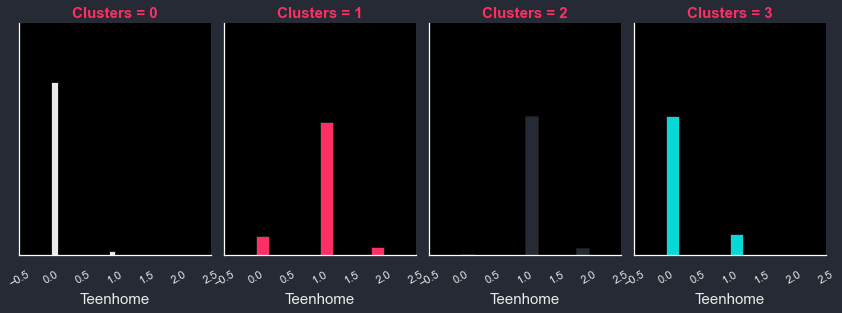

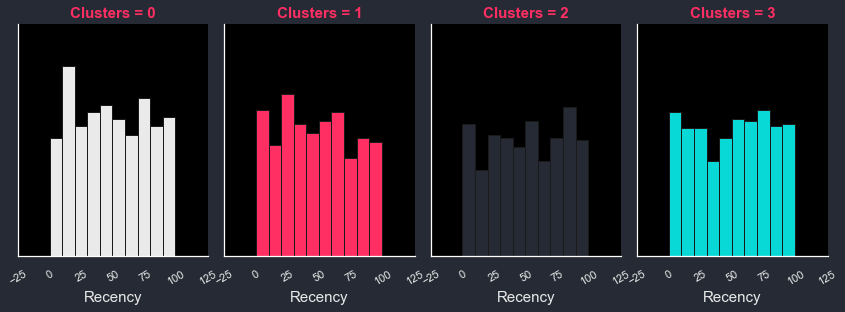

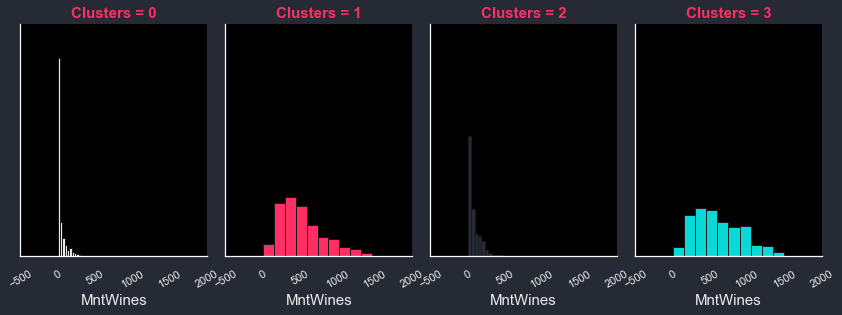

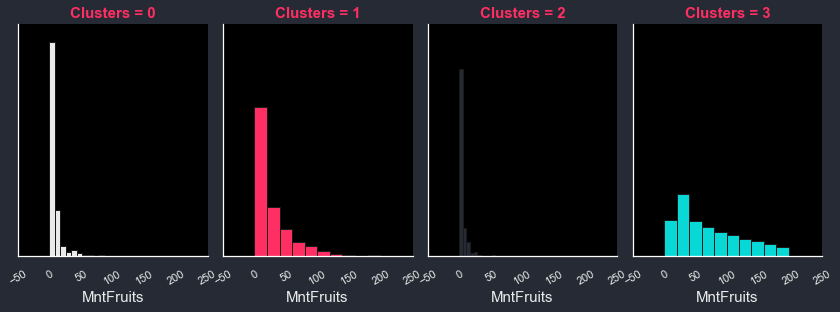

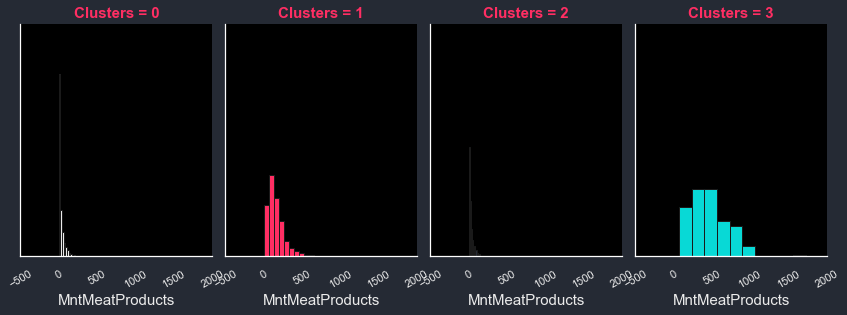

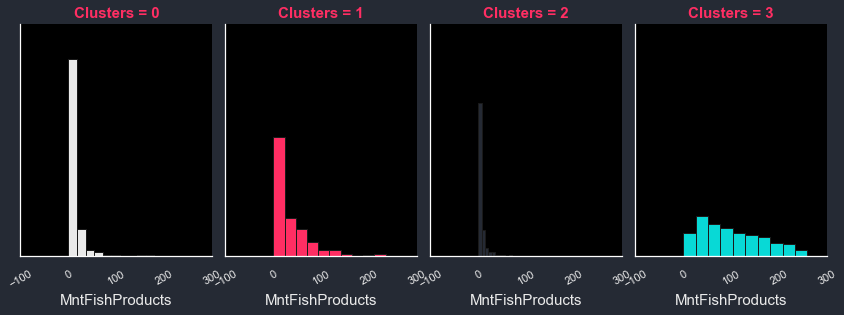

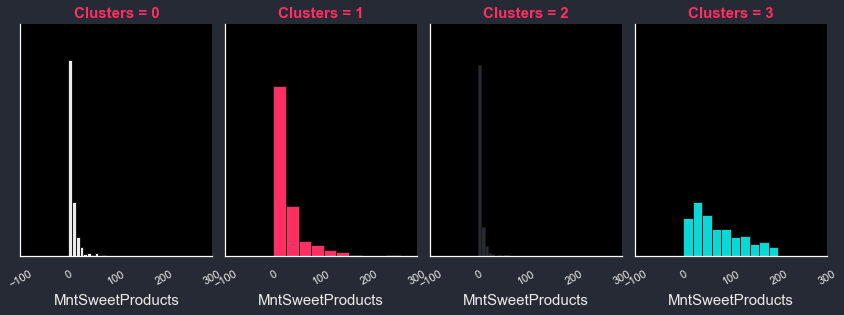

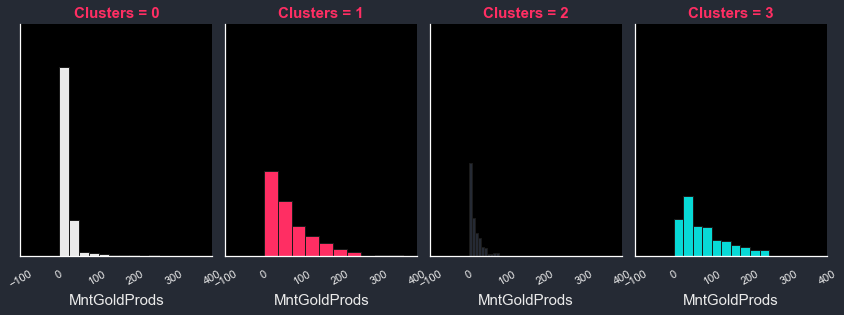

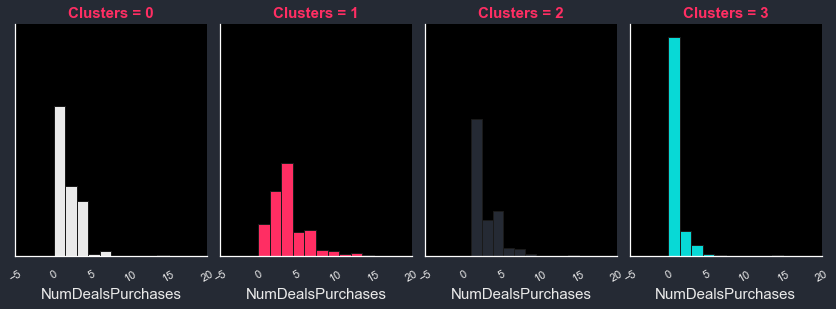

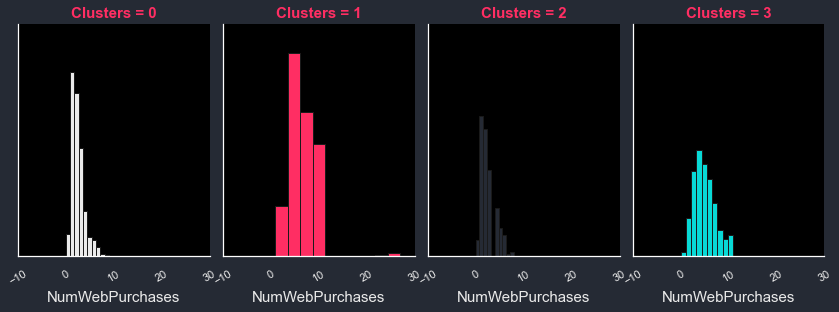

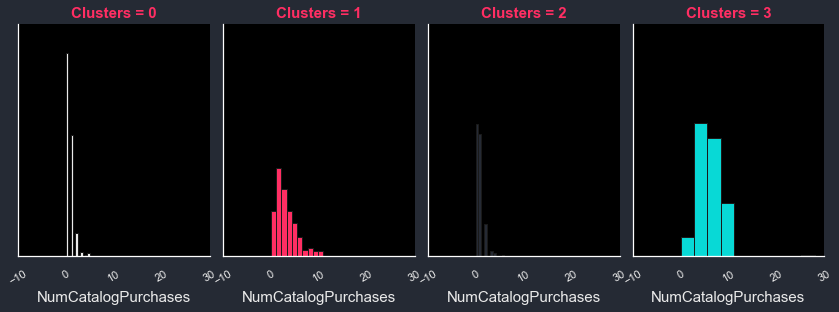

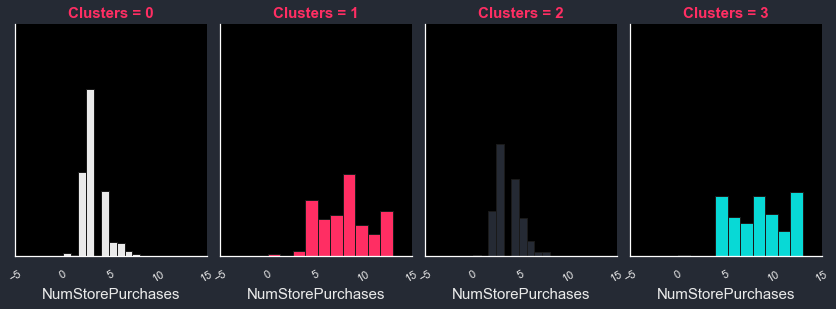

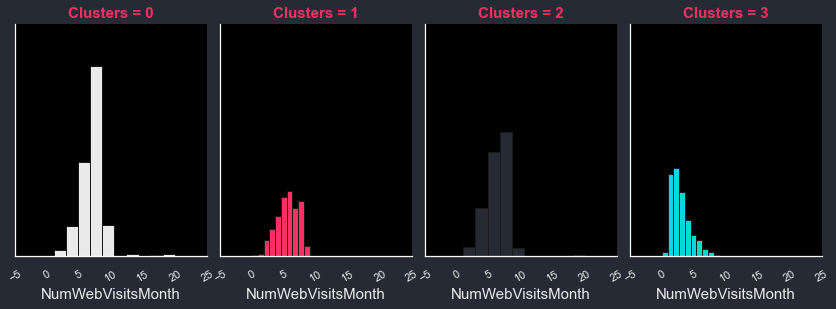

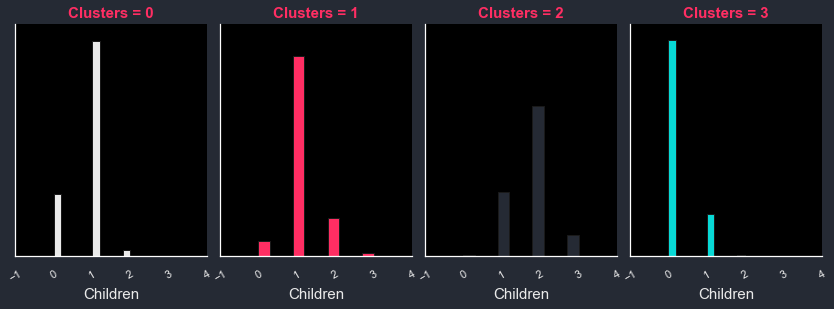

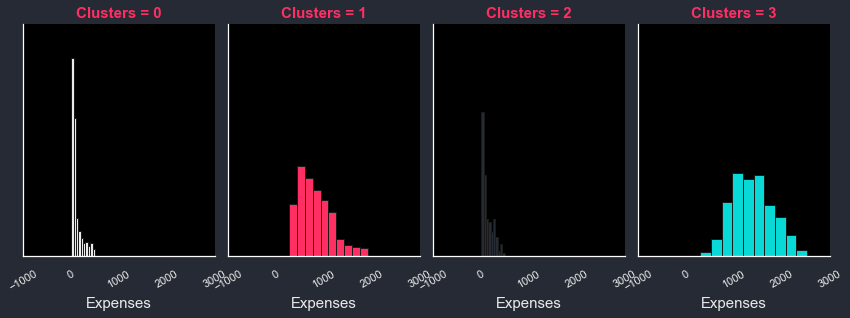

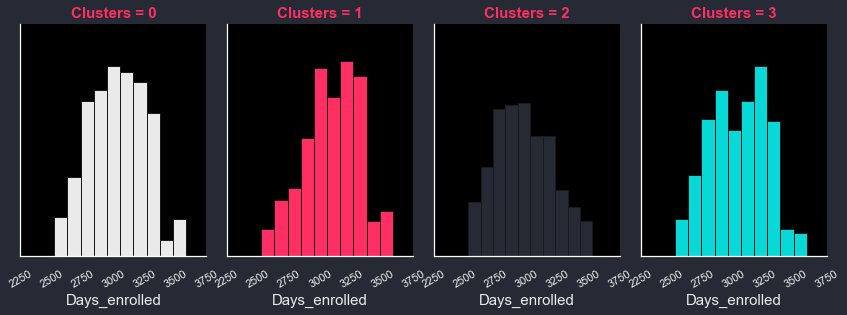

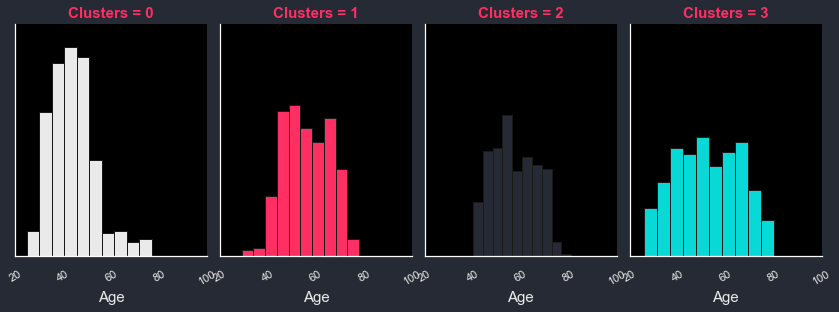

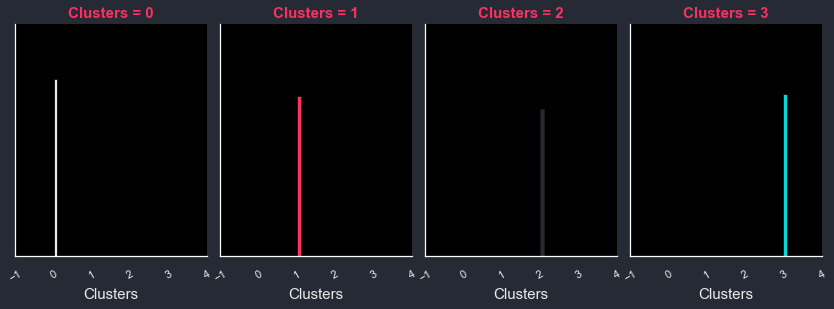

In [55]:
# Clusters interpretation
sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':color[2], 'axes.grid' : False})

for i in df.iloc[:,3:]:
    g = sns.FacetGrid(df.iloc[:,3:], col = "Clusters", hue = "Clusters", palette = palette)
    g.map(plt.hist, i, bins=10, ec="k") 
    g.set_xticklabels(rotation=30, color = color[0])
    g.set_yticklabels(color = color[0])
    g.set_xlabels(size=15, color = color[0])
    g.set_titles(size=15, color = color[1], fontweight="bold")
    g.fig.set_figheight(5)

- **Cluster 0**:People with lowest incomes and lowest spending habits that tend to have one child. We will call this **group economical customers**.

- **Cluster 1**: People with the higher incomes and the higher spending habits. We will call this **good customers**.

- **Cluster 2**: People with high incomes and lower spending habits. We will call this **cheap customers**.

- **Cluster 3**: People with highest incomes and highest spending habits. We will call this **group elite customers**.

In [58]:
cluster_counts = PCA_ds["Clusters"].value_counts()
cluster_counts = cluster_counts.to_frame().reset_index()                      # Convert series to dataframe
cluster_counts.columns = ['Clusters', 'count']                                # Rename column names
cluster_counts = cluster_counts.sort_values('Clusters', ascending = True)     # Sorting data
labels = [
    "Economical Customers",
    "Good Customers",
    "Cheap Customers",
    "Elite Customers"
]

([<matplotlib.patches.Wedge at 0x1547e071640>,
 [Text(-0.7492965234693735, 0.87238450233639, 'Economical Customers'),
  Text(0.9224954576451968, 0.6866601274458705, 'Good Customers'),
  Text(0.7542027811202233, -0.8681463960361299, 'Cheap Customers'),
  Text(-0.813459280940663, -0.8128862148243746, 'Elite Customers')],
 [Text(-0.4235154263087763, 0.493086892624916, '27.4%'),
  Text(0.5214104760603285, 0.3881122459476659, '24.8%'),
  Text(0.42628852845925663, -0.4906914412378125, '22.8%'),
  Text(-0.4597813327055921, -0.4594574257702987, '25.0%')])

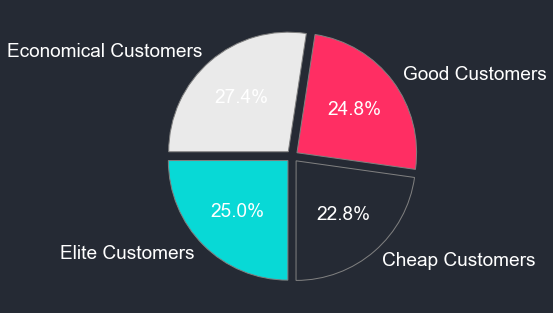

In [59]:
plt.pie(cluster_counts['count'], 
        explode=(0.05, 0.05, 0.05, 0.05), 
        labels = labels,
        colors= color,
        autopct='%1.1f%%',
        textprops = dict(color ="white", fontsize=19),
        counterclock = False,
        startangle=180,
        wedgeprops={"edgecolor":"gray",'linewidth': 1}
        )

### Conclusions

1. Wine and meat are the most popular products amongst all the richer groups. It would be beneficial to offer a greater variety of these products or special deals in these categories.
2. There are plenty of people who have been members of the company for a long time , so offering various loyalty offers  like membership discounts , coupons and free samples to such active , long time customers.
3. People with no or less children are not spending enough on groceries rather they are spending on gold ,wines so business should focus on this segment especially.
4. One group has really low income so the business should focus providing affordable groceries.